In [2]:
from IPython.display import display_html
display_html("""<button onclick="$('.input, .prompt, .output_stderr, .output_error').toggle();">Click to hide/show the code</button>""", raw=True)


Click to hide/show the code

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    #start_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    return df

In [3]:
raw_data = pd.read_csv('./dataset/train_V2.csv')

In [4]:
raw_data = reduce_mem_usage(raw_data)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int8
boosts             int8
damageDealt        float16
DBNOs              int8
headshotKills      int8
heals              int8
killPlace          int8
killPoints         int16
kills              int8
killStreaks        int8
longestKill        float16
matchDuration      int16
matchType          object
maxPlace           int8
numGroups          int8
rankPoints         int16
revives            int8
rideDistance       float16
roadKills          int8
swimDistance       float16
teamKills          int8
vehicleDestroys    int8
walkDistance       float16
weaponsAcquired    int16
winPoints          int16
winPlacePerc       float16
dtypes: float16(6), int16(5), int8(14), object(4)
memory usage: 288.4+ MB


In [6]:
raw_data.head().T

,0,1,2,3,4
Id,7f96b2f878858a,eef90569b9d03c,1eaf90ac73de72,4616d365dd2853,315c96c26c9aac
groupId,4d4b580de459be,684d5656442f9e,6a4a42c3245a74,a930a9c79cd721,de04010b3458dd
matchId,a10357fd1a4a91,aeb375fc57110c,110163d8bb94ae,f1f1f4ef412d7e,6dc8ff871e21e6
assists,0,0,1,0,0
boosts,0,0,0,0,0
damageDealt,0,91.5,68,32.9062,100
DBNOs,0,0,0,0,0
headshotKills,0,0,0,0,0
heals,0,0,0,0,0
killPlace,60,57,47,75,45


## Data fields 
Classified by properties：


### match & players's characters:

---
- Id - Player’s Id
- groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
- numGroups - Number of groups we have data for in the match.
- matchDuration - Duration of match in seconds.
- matchId - ID to identify match. There are no matches that are in both the train and testing set.
- matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
- rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.

### Kill Relational:

---
- DBNOs - Number of enemy players knocked. 
- killPlace - Ranking in match of number of enemy players killed.
- killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
- killStreaks - Max number of enemy players killed in a short amount of time.
- kills - Number of enemy players killed.
- longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
- headshotKills - Number of enemy players killed with headshots.
- roadKills - Number of kills while in a vehicle.
- teamKills - Number of times this player killed a teammate.

### Heal relational:

---
- assists - Number of enemy players this player damaged that were killed by teammates.
- boosts - Number of boost items used.
- damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
- heals - Number of healing items used.
- revives - Number of times this player revived teammates.

### Move relational:

---
- rideDistance - Total distance traveled in vehicles measured in meters.
- swimDistance - Total distance traveled by swimming measured in meters.
- vehicleDestroys - Number of vehicles destroyed.
- walkDistance - Total distance traveled on foot measured in meters.

### Weapon relational:

---
- weaponsAcquired - Number of weapons picked up.

### Result relational:

---
- maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

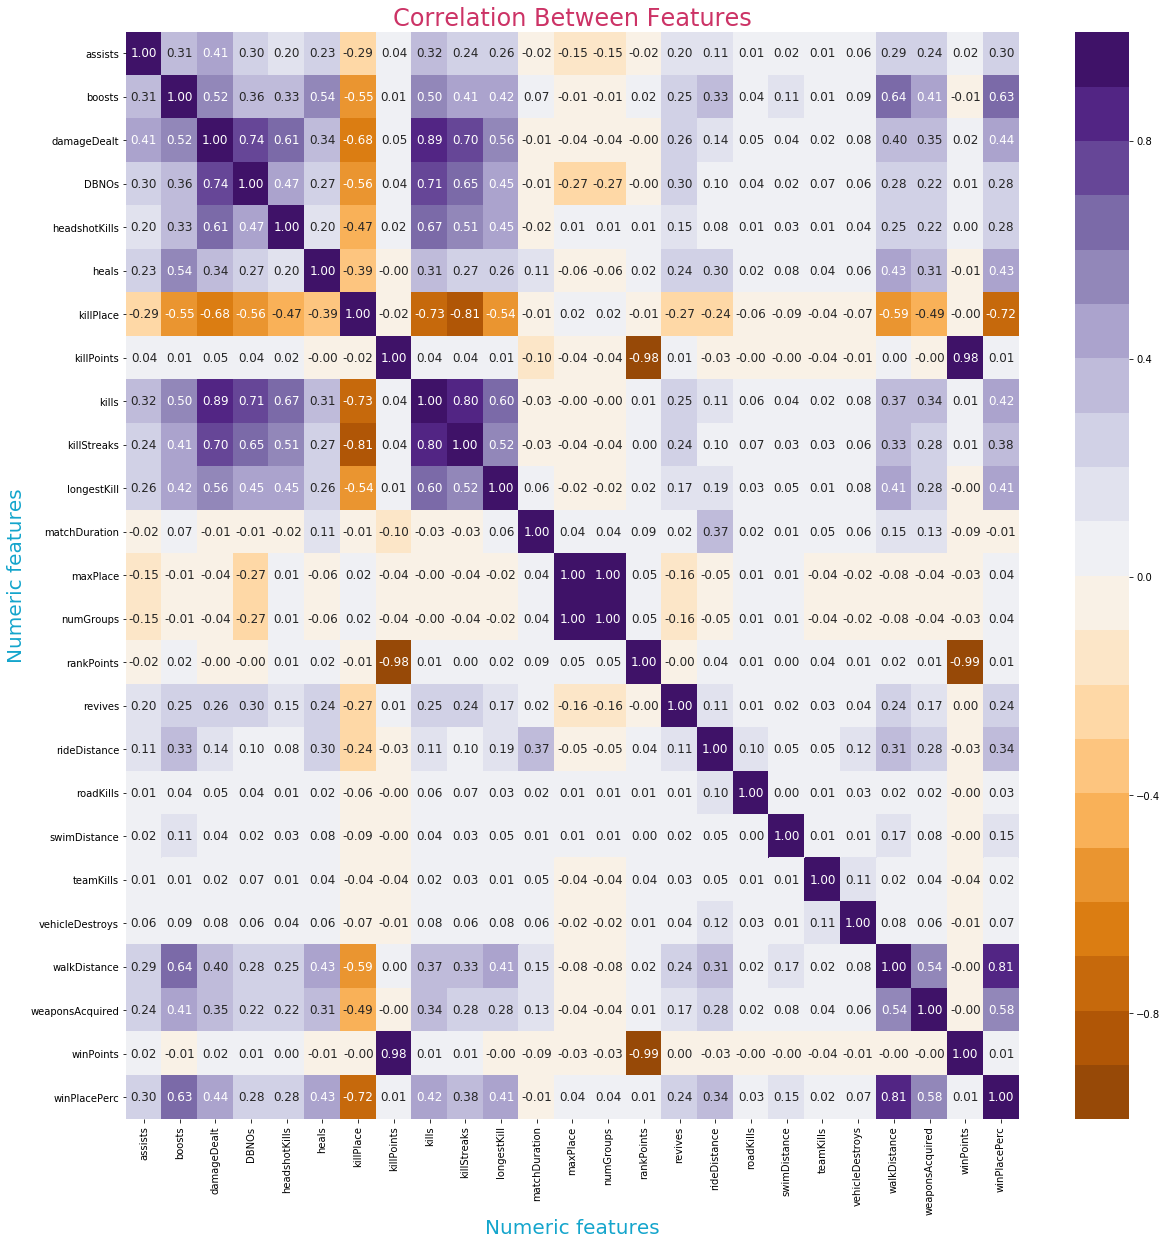

In [5]:
corr = raw_data.corr()
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True linewidths=1,
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, annot=True,  fmt= '.2f',ax=ax, annot_kws={'size': 12}, cmap=sns.color_palette("PuOr", 20))

ax.set_xlabel('Numeric features', size=20, color="#14A5CC")
ax.set_ylabel('Numeric features', size=20, color="#14A5CC")
ax.set_title('Correlation Between Features', size=24, color="#CC3366")

plt.show()

In [6]:
# corr = raw_data.corr()
cols_largest = corr.nlargest(10, 'winPlacePerc').index
# cols_smallest = corr.nsmallest(10, 'winPlacePerc').index
# cols_largest
# print(cols_smallest)

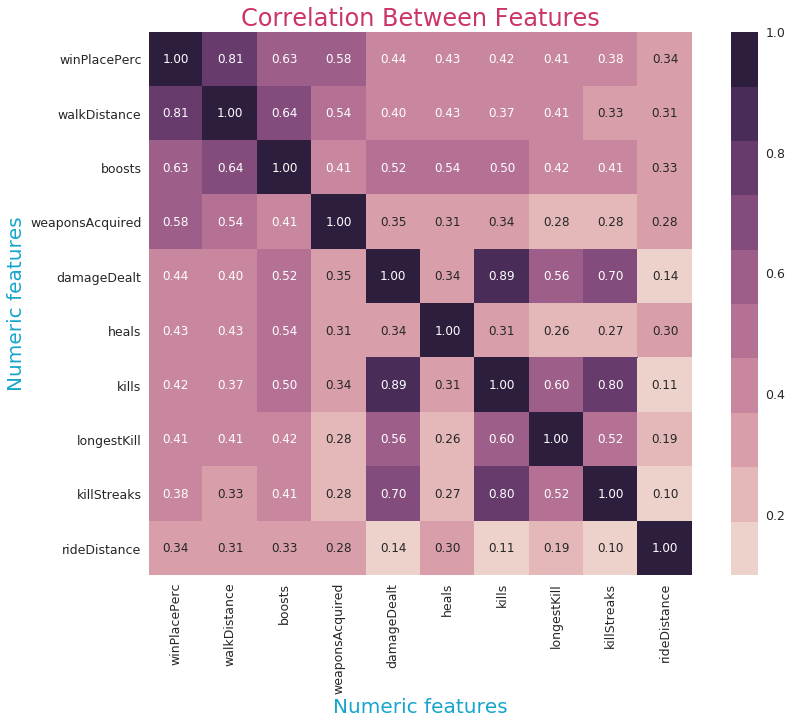

In [7]:
cl = raw_data[cols_largest].corr()
# cl = corr[cols_largest]
# print(cl)
sns.set(font_scale=1.25)
f,ax = plt.subplots(figsize=(14, 10))
hm = sns.heatmap(cl, cbar=True, annot=True, square=True, fmt='.2f', \
                 annot_kws={'size': 12}, cmap = sns.cubehelix_palette(10), \
                 yticklabels=cols_largest.values, xticklabels=cols_largest.values)

ax.set_xlabel('Numeric features', size=20, color="#14A5CC")
ax.set_ylabel('Numeric features', size=20, color="#14A5CC")
ax.set_title('Correlation Between Features', size=24, color="#CC3366")
plt.show()

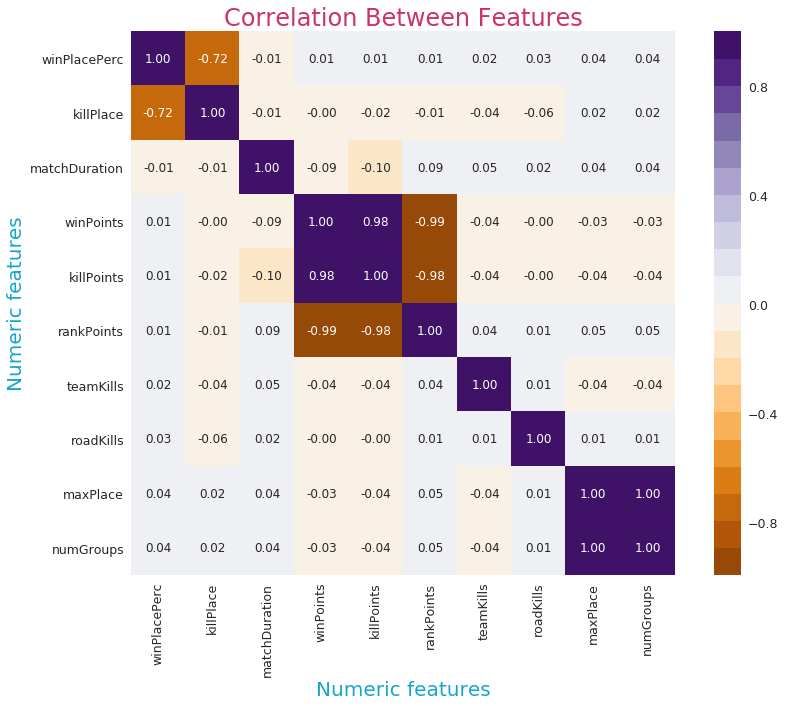

In [8]:
cols_win = corr.nlargest(1, 'winPlacePerc').index
cols_smallest = corr.nsmallest(9, 'winPlacePerc').index
low_data = pd.concat([raw_data[cols_win], raw_data[cols_smallest]], axis = 1)
# low_data.info()

cs = low_data.corr()
cols_s = cs.index
# cl = corr[cols_largest]
# print(cl)
sns.set(font_scale=1.25)
f,ax = plt.subplots(figsize=(14, 10))
hm = sns.heatmap(cs, cbar=True, annot=True, square=True, fmt='.2f', \
                 annot_kws={'size': 12}, cmap=sns.color_palette("PuOr", 20), \
                 yticklabels=cols_s.values, xticklabels=cols_s.values)

ax.set_xlabel('Numeric features', size=20, color="#14A5CC")
ax.set_ylabel('Numeric features', size=20, color="#14A5CC")
ax.set_title('Correlation Between Features', size=24, color="#CC3366")
plt.show()

In [1]:
print(1)

1


## HeatMap
Red means the correlation between the 2 columns > 0, blue means correlation <0.

<font color = "#CC3366">
    The aim is to find the correlation between the predict: winPlacePerc and the other features 
</font>

### Highest correlations:
1. 'walkDistance' - 0.81
2. 'boosts' - 0.63
3. 'weaponAcquired' - 0.58
4. 'damageDealt' - 0.44

In [19]:
z = raw_data['matchType']
# print(raw_data.info())
print(z.value_counts())

squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536762
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64


## MatchType

The dataset contains more than 6 of the basic matchType, because it contains customize and event mode matches. So we considered these matches as outliers and drop them.


In [9]:
drop_data = raw_data.loc[raw_data['matchType'].isin(['solo','solo-fpp','duo','duo-fpp','squad','squad-fpp'])]

In [10]:
# drop_data.drop(drop_data['Id']=='f70c74418bb064 & drop_data[groupId] == '12dfbede33f92b')
drop_data = drop_data.drop(drop_data[drop_data['winPlacePerc'].isnull() == True].index)

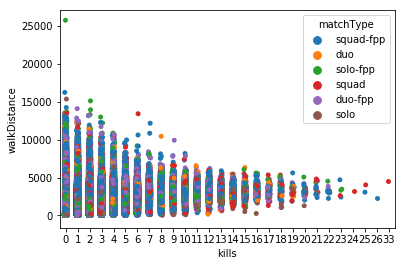

In [8]:
# x = drop_data['kills']
# y = drop_data['walkDistance']
# z = drop_data['matchType']
# data1 = pd.concat([x,y,z],axis = 1)
# sns.stripplot(x="kills", y="walkDistance", hue="matchType", data=data1, jitter = True)

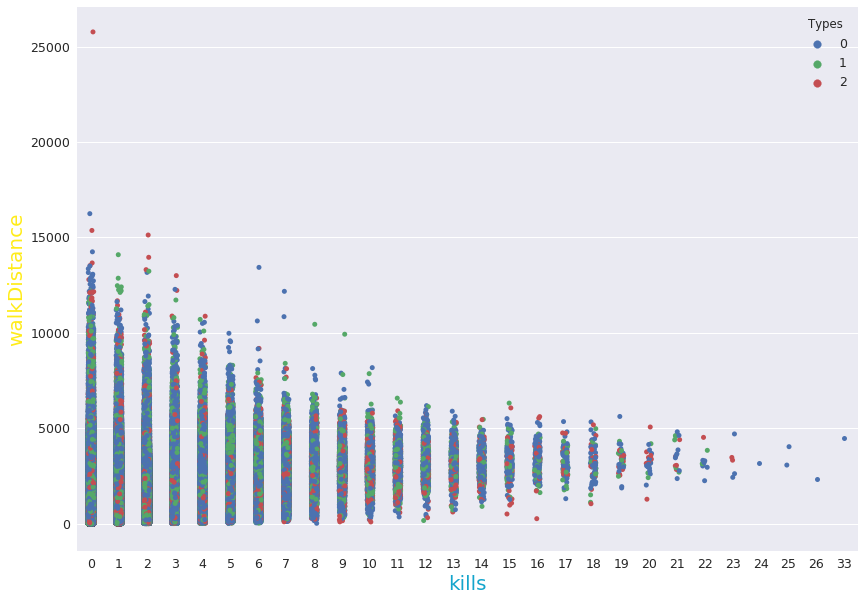

In [13]:
x = drop_data['kills']
y = drop_data['walkDistance']
drop_data['Types'] = drop_data['numGroups']//35
z = drop_data['Types']
# z = drop_data['matchType']
data2 = pd.concat([x,y,z], axis = 1)
f,ax = plt.subplots(figsize=(14, 10))
ax.set_xlabel('kills', size=20, color="#14A5CC")
ax.set_ylabel('walkDistance', size=20, color="#FFEC19")
sns.stripplot(x="kills", y="walkDistance", hue ='Types', data=data2, jitter = True)
plt.show()

In [51]:
del pair_data

In [11]:
x1 = drop_data[cols_largest]
drop_data['Types'] = drop_data['numGroups']//35
# x1.info()
x2 = drop_data['Types']
data3 = pd.concat([x1,x2], axis = 1)
top10_data = data3.copy()

In [14]:
# pair_data['class'] = pair_data['numGroups']//35
# pair_data.head()
top10_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4411698 entries, 0 to 4446965
Data columns (total 11 columns):
winPlacePerc       float16
walkDistance       float16
boosts             int8
weaponsAcquired    int16
damageDealt        float16
heals              int8
kills              int8
longestKill        float16
killStreaks        int8
rideDistance       float16
Types              int8
dtypes: float16(5), int16(1), int8(5)
memory usage: 105.2 MB


## Top 10 relationship

In this part，it shows the relationship between the features that has the top-10 highest correlations with 'winPlacePerc'

99% of players' kill per match is lower than 7.0


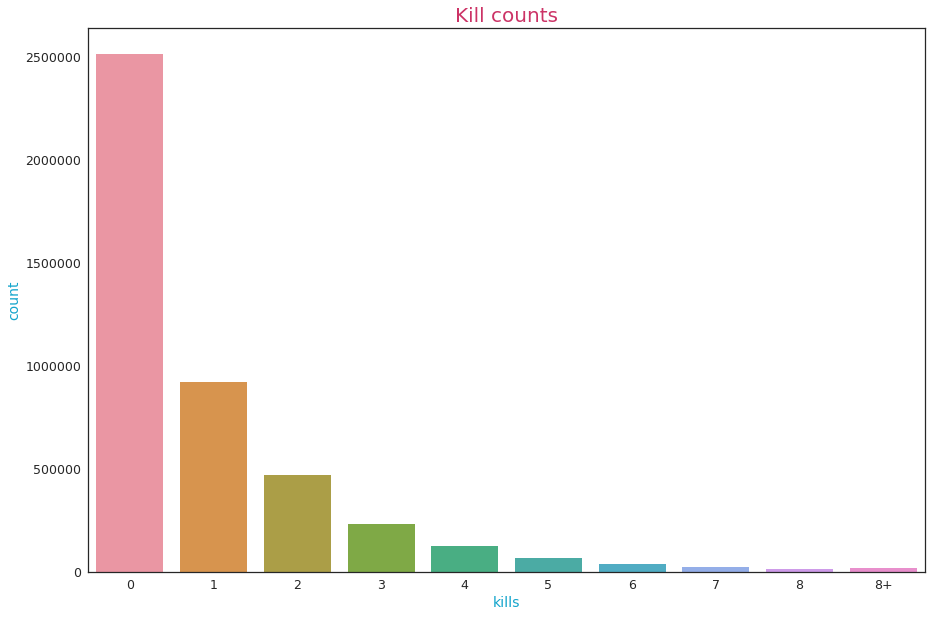

In [31]:
data = top10_data.copy()
print("99% of players' kill per match is lower than {}".format(data['kills'].quantile(0.99)))
data.loc[data['kills'] > 8] = '8+'
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(data['kills'].astype('str').sort_values())
ax.set_xlabel('kills', size=14, color="#14A5CC")
ax.set_ylabel('count', size=14, color="#14A5CC")
ax.set_title('Kill counts', size=20, color="#CC3366")
plt.show()

In [32]:
del data

In [ ]:
sns.jointplot(x="kills", y="", data=top10_data, kind="kde");

In [ ]:
# x = [10, 30, 50, 70, 90]
# y_train = [0.055873, 0.020674, 0.019558, 0.019563, 0.019566]
# y_test = [0.063409, 0.060478, 0.060568, 0.060599, 0.060659]

99% of players' walk distance is lower than 4396.0 meters


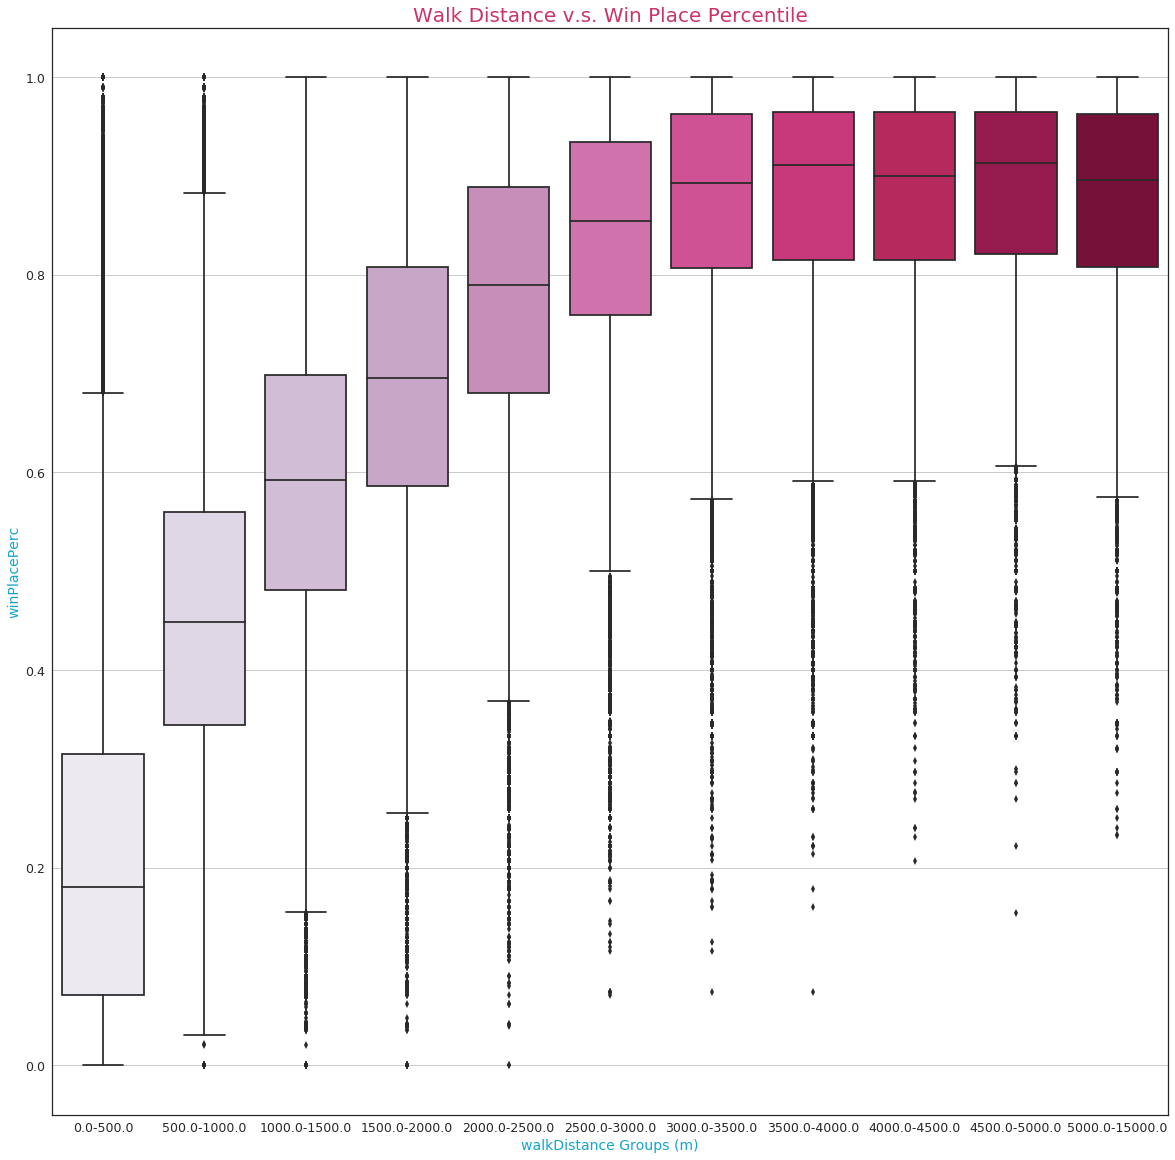

In [64]:
kills = top10_data[['walkDistance','winPlacePerc']].copy()

print("99% of players' walk distance is lower than {} meters".format(kills['walkDistance'].quantile(0.99)))

cut_range = np.linspace(0,5000,11)
cut_range = np.append(cut_range, 15000)
kills['walkDistanceGrouping'] = pd.cut(kills['walkDistance'],
                                 cut_range,
                                 labels=["{}-{}".format(a_, b_) for a_, b_ in zip(cut_range[:21], cut_range[1:])],
                                 include_lowest=True
                                )

fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(x="walkDistanceGrouping", y="winPlacePerc", data=kills, ax=ax, palette=sns.color_palette("PuRd", 11))
ax.set_xlabel('walkDistance Groups (m)', size=14, color="#14A5CC")
ax.set_ylabel('winPlacePerc', size=14, color="#14A5CC")
ax.set_title('Walk Distance v.s. Win Place Percentile', size=20, color="#CC3366")
plt.gca().yaxis.grid(True)
plt.show()

In [25]:
sns.set_style('white')

99% of players' damage per match is lower than 759.0


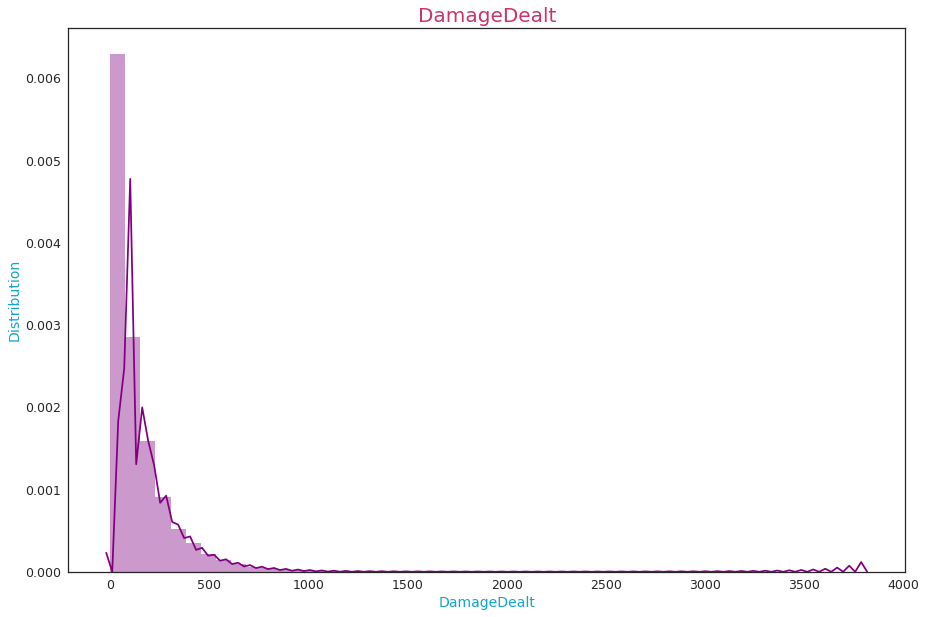

In [37]:
data = top10_data.copy()
print("99% of players' damage per match is lower than {}".format(data['damageDealt'].quantile(0.99)))
fig, ax = plt.subplots(figsize=(15,10))
h = sns.distplot(data['damageDealt'], color = 'Purple')
ax.set_xlabel('DamageDealt', size=14, color="#14A5CC")
ax.set_ylabel('Distribution', size=14, color="#14A5CC")
ax.set_title('DamageDealt', size=20, color="#CC3366")
plt.show()

In [38]:
del data

In [12]:
# # data = drop_data.copy()
# data['headshotRate'] = data['headshotKills']/data['kills']
# x1 = data['headshotRate']
# y1 = data['winPlacePerc']
# d1 = pd.concat([x1,y1], axis = 1)
# fig, ax = plt.subplots(figsize=(20,20))
# cmap = sns.cubehelix_palette(light=1, as_cmap=True)
# sns.kdeplot(cmap=cmap, data = d1, shade=True);
# # sns.boxplot(x="walkDistanceGrouping", y="winPlacePerc", data=kills, ax=ax, palette=sns.color_palette("PuRd", 11))
# ax.set_xlabel('walkDistance Groups (m)', size=14, color="#14A5CC")
# ax.set_ylabel('winPlacePerc', size=14, color="#14A5CC")
# ax.set_title('Walk Distance v.s. Win Place Percentile', size=20, color="#CC3366")
# plt.gca().xaxis.grid(True)
# plt.show()

99% of players' roadlill per match is no more than 0.0
99.9% of players' roadlill per match is lower than 1.0


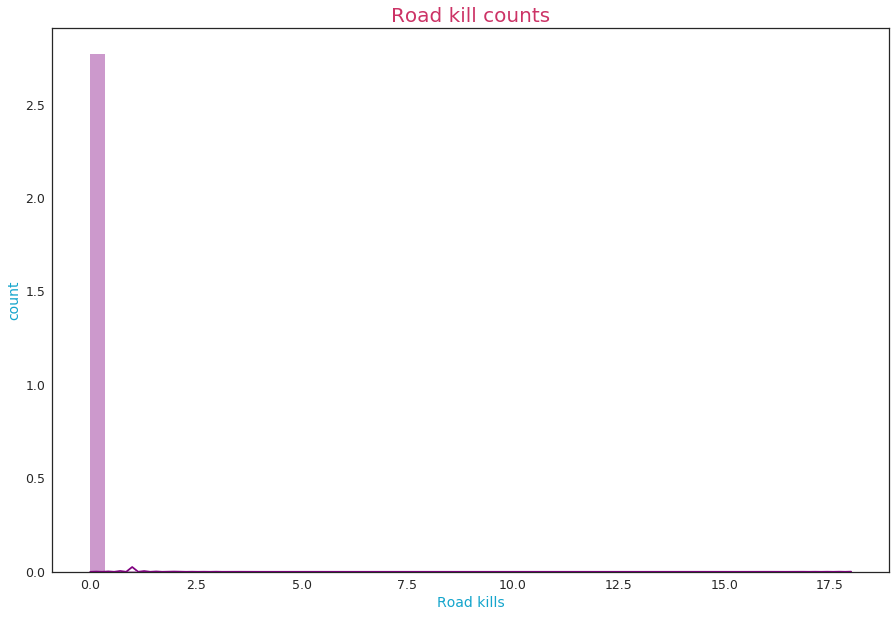

In [55]:
data = drop_data['roadKills']
print("99% of players' roadlill per match is no more than {}".format(data.quantile(0.99)))
print("99.9% of players' roadlill per match is lower than {}".format(data.quantile(0.999)))
# data.loc[data['kills'] > 8] = '8+'
fig, ax = plt.subplots(figsize=(15,10))
sns.distplot(data, color = 'Purple')
ax.set_xlabel('Road kills', size=14, color="#14A5CC")
ax.set_ylabel('count', size=14, color="#14A5CC")
ax.set_title('Road kill counts', size=20, color="#CC3366")
plt.show()

In [56]:
del data

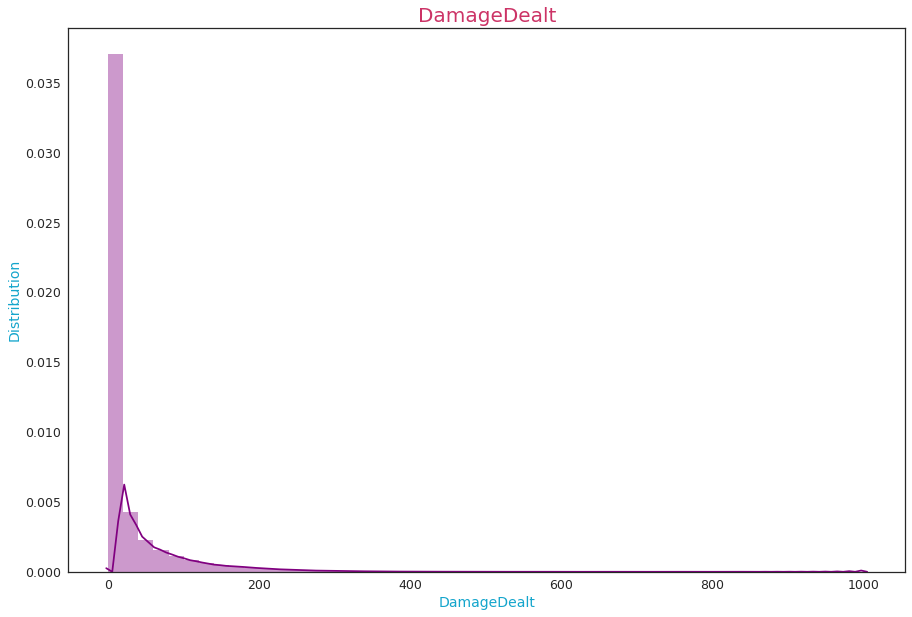

In [57]:
data = drop_data['longestKill']
# print("99% of players' damage per match is lower than {}".format(data['damageDealt'].quantile(0.99)))
fig, ax = plt.subplots(figsize=(15,10))
h = sns.distplot(data, color = 'Purple')
ax.set_xlabel('DamageDealt', size=14, color="#14A5CC")
ax.set_ylabel('Distribution', size=14, color="#14A5CC")
ax.set_title('DamageDealt', size=20, color="#CC3366")
plt.show()

99% of players' walk distance is lower than 242.75 meters


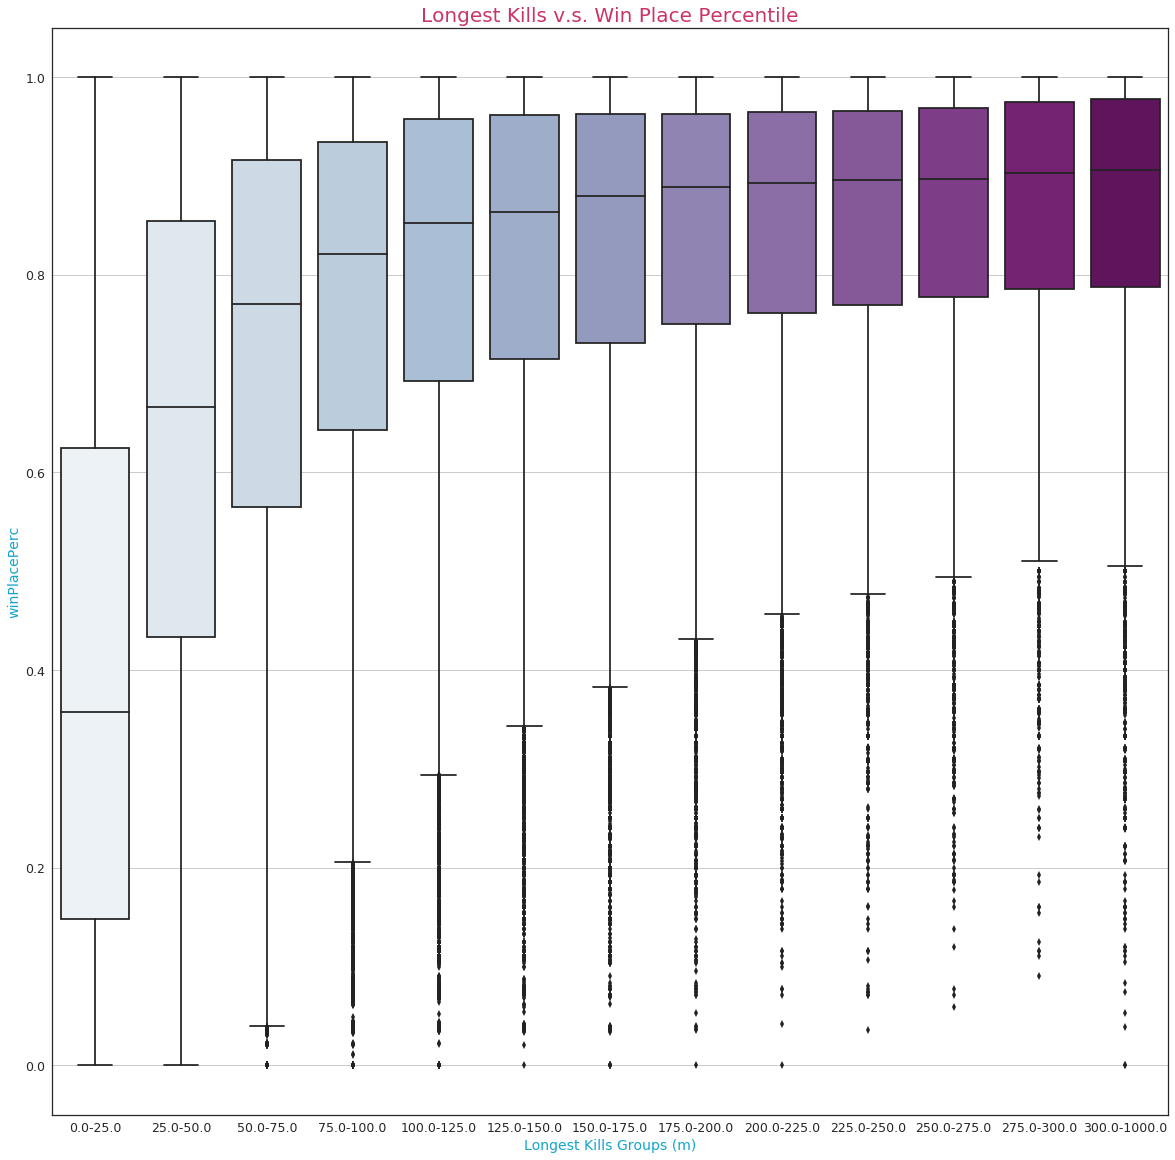

In [55]:
d1 = drop_data['longestKill']
d2 = drop_data['winPlacePerc']
data = pd.concat([d1,d2], axis = 1)
kills = data.copy()
print("99% of players' walk distance is lower than {} meters".format(kills['longestKill'].quantile(0.99)))

cut_range = np.linspace(0,300,13)
cut_range = np.append(cut_range, 1000)
kills['longestKillGrouping'] = pd.cut(kills['longestKill'],
                                 cut_range,
                                 labels=["{}-{}".format(a_, b_) for a_, b_ in zip(cut_range[:14], cut_range[1:])],
                                 include_lowest=True
                                )

fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(x="longestKillGrouping", y="winPlacePerc", data=kills, ax=ax, palette=sns.color_palette("BuPu", 13))
ax.set_xlabel('Longest Kills Groups (m)', size=14, color="#14A5CC")
ax.set_ylabel('winPlacePerc', size=14, color="#14A5CC")
ax.set_title('Longest Kills v.s. Win Place Percentile', size=20, color="#CC3366")
plt.gca().yaxis.grid(True)
plt.show()

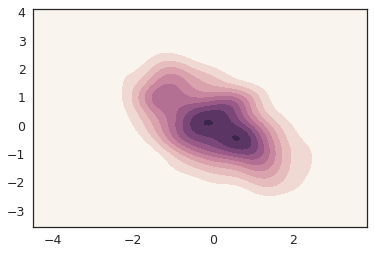

In [65]:
x, y = np.random.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]], size=300).T
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(x, y, cmap=cmap, shade=True);

In [ ]:
# sns.jointplot(x="longestKill", y="winPlacePerc", data=data, kind="kde");

99% of players' get less than 10.0 weapons


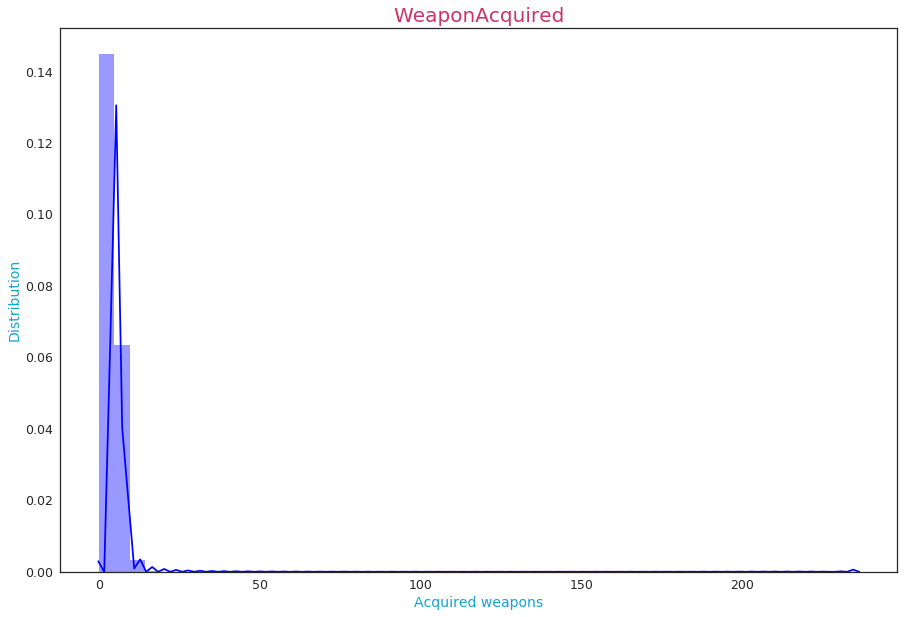

In [26]:
# data = drop_data['weaponsAcquired']
print("99% of players' get less than {} weapons".format(data.quantile(0.99)))
fig, ax = plt.subplots(figsize=(15,10))
h = sns.distplot(data, color = 'blue')
ax.set_xlabel('Acquired weapons', size=14, color="#14A5CC")
ax.set_ylabel('Distribution', size=14, color="#14A5CC")
ax.set_title('WeaponAcquired', size=20, color="#CC3366")
plt.show()

99% of players' kill per match is lower than 10.0


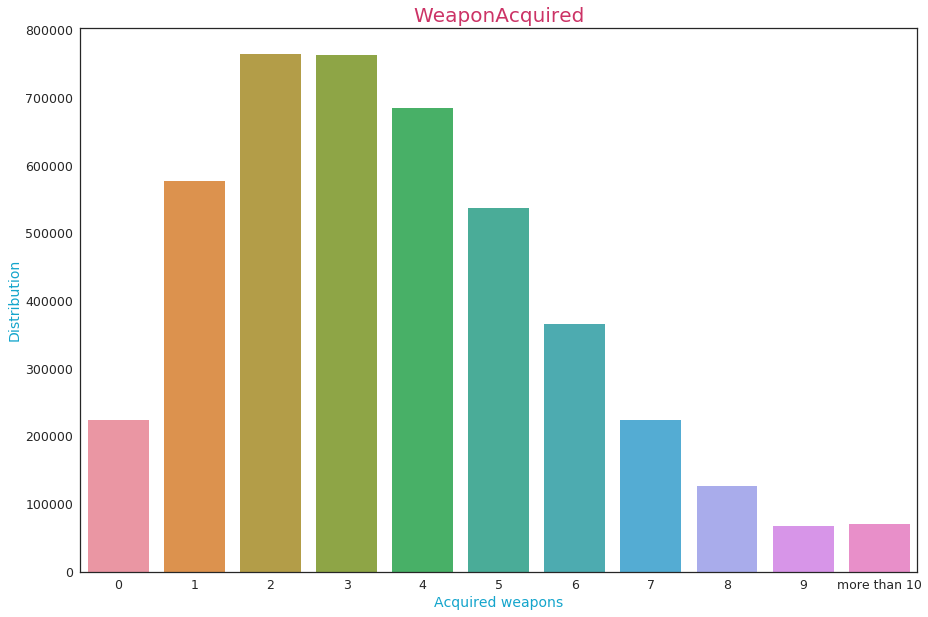

In [40]:
data = drop_data['weaponsAcquired'].copy()
print("99% of players' kill per match is lower than {}".format(data.quantile(0.99)))
data.loc[data > 9] = 'more than 10'
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(data.astype('str').sort_values())
ax.set_xlabel('Acquired weapons', size=14, color="#14A5CC")
ax.set_ylabel('Count', size=14, color="#14A5CC")
ax.set_title('WeaponAcquired', size=20, color="#CC3366")
plt.show()

In [56]:
del kills

In [50]:
# d1 = drop_data['weaponsAcquired']
# d2 = drop_data['winPlacePerc']
# data = pd.concat([d1,d2], axis = 1)
# kills = data.copy()
# print("99% of players get lower than {} weapons in a match".format(kills['weaponsAcquired'].quantile(0.99)))
# print("99.9% of players get lower than {} weapons in a match".format(kills['weaponsAcquired'].quantile(0.999)))
# cut_range = np.linspace(0,20,11)
# cut_range = np.append(cut_range, 100)
# kills['longestKillGrouping'] = pd.cut(kills['weaponsAcquired'],
#                                  cut_range,
#                                  labels=["{}-{}".format(a_, b_) for a_, b_ in zip(cut_range[:12], cut_range[1:])],
#                                  include_lowest=True
#                                 )

# fig, ax = plt.subplots(figsize=(20,20))
# sns.stripplot(x="longestKillGrouping", y="winPlacePerc", data=kills, ax=ax, palette=sns.color_palette("BuPu", 12))
# ax.set_xlabel('Longest Kills Groups (m)', size=14, color="#14A5CC")
# ax.set_ylabel('winPlacePerc', size=14, color="#14A5CC")
# ax.set_title('Longest Kills v.s. Win Place Percentile', size=20, color="#CC3366")
# plt.gca().yaxis.grid(True)
# plt.show()

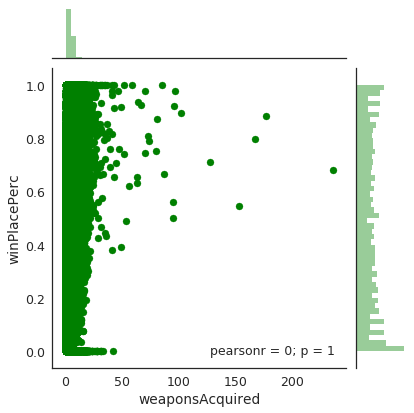

In [58]:
d1 = drop_data['weaponsAcquired']
d2 = drop_data['winPlacePerc']
data = pd.concat([d1,d2], axis = 1)
kills = data.copy()
# fig, ax = plt.subplots(figsize=(15,10))
sns.jointplot(x="weaponsAcquired", y="winPlacePerc", data=kills, color = 'green')
# ax.set_xlabel('Longest Kills Groups (m)', size=14, color="#14A5CC")
# ax.set_ylabel('winPlacePerc', size=14, color="#14A5CC")
# ax.set_title('Longest Kills v.s. Win Place Percentile', size=20, color="#CC3366")
# plt.gca().yaxis.grid(True)
plt.show()

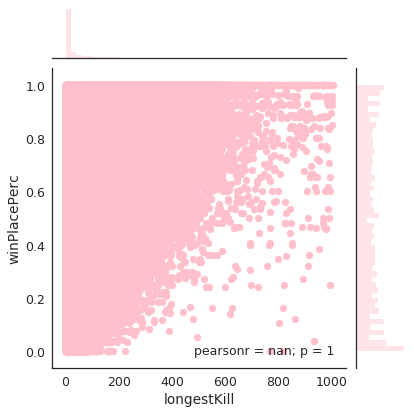

In [61]:
d1 = drop_data['longestKill']
d2 = drop_data['winPlacePerc']
data = pd.concat([d1,d2], axis = 1)
kills = data.copy()
# fig, ax = plt.subplots(figsize=(15,10))
sns.jointplot(x="longestKill", y="winPlacePerc", data=kills, color = 'pink')
# ax.set_xlabel('Longest Kills Groups (m)', size=14, color="#14A5CC")
# ax.set_ylabel('winPlacePerc', size=14, color="#14A5CC")
# ax.set_title('Longest Kills v.s. Win Place Percentile', size=20, color="#CC3366")
# plt.gca().yaxis.grid(True)
plt.show()

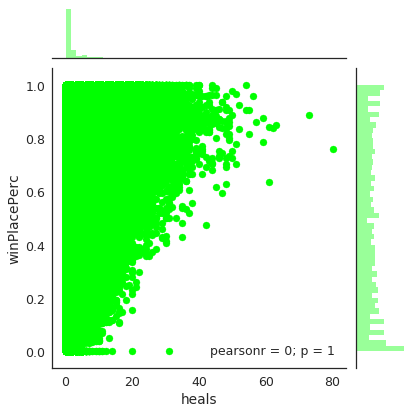

In [62]:
d1 = drop_data['heals']
d2 = drop_data['winPlacePerc']
data = pd.concat([d1,d2], axis = 1)
kills = data.copy()
# fig, ax = plt.subplots(figsize=(15,10))
sns.jointplot(x="heals", y="winPlacePerc", data=kills, color = 'lime')
# ax.set_xlabel('Longest Kills Groups (m)', size=14, color="#14A5CC")
# ax.set_ylabel('winPlacePerc', size=14, color="#14A5CC")
# ax.set_title('Longest Kills v.s. Win Place Percentile', size=20, color="#CC3366")
# plt.gca().yaxis.grid(True)
plt.show()

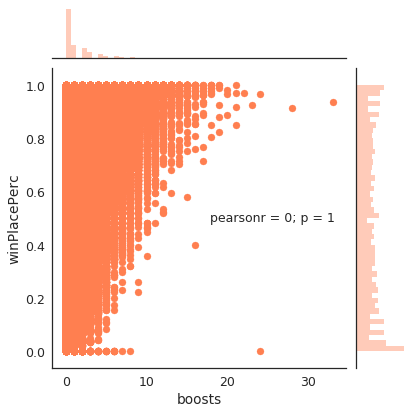

In [64]:
d1 = drop_data['boosts']
d2 = drop_data['winPlacePerc']
data = pd.concat([d1,d2], axis = 1)
kills = data.copy()
# fig, ax = plt.subplots(figsize=(15,10))
sns.jointplot(x="boosts", y="winPlacePerc", data=kills, color = 'coral')
# ax.set_xlabel('Longest Kills Groups (m)', size=14, color="#14A5CC")
# ax.set_ylabel('winPlacePerc', size=14, color="#14A5CC")
# ax.set_title('Longest Kills v.s. Win Place Percentile', size=20, color="#CC3366")
# plt.gca().yaxis.grid(True)
plt.show()

In [65]:
del data

99% of players' walk distance is lower than 7.0 meters


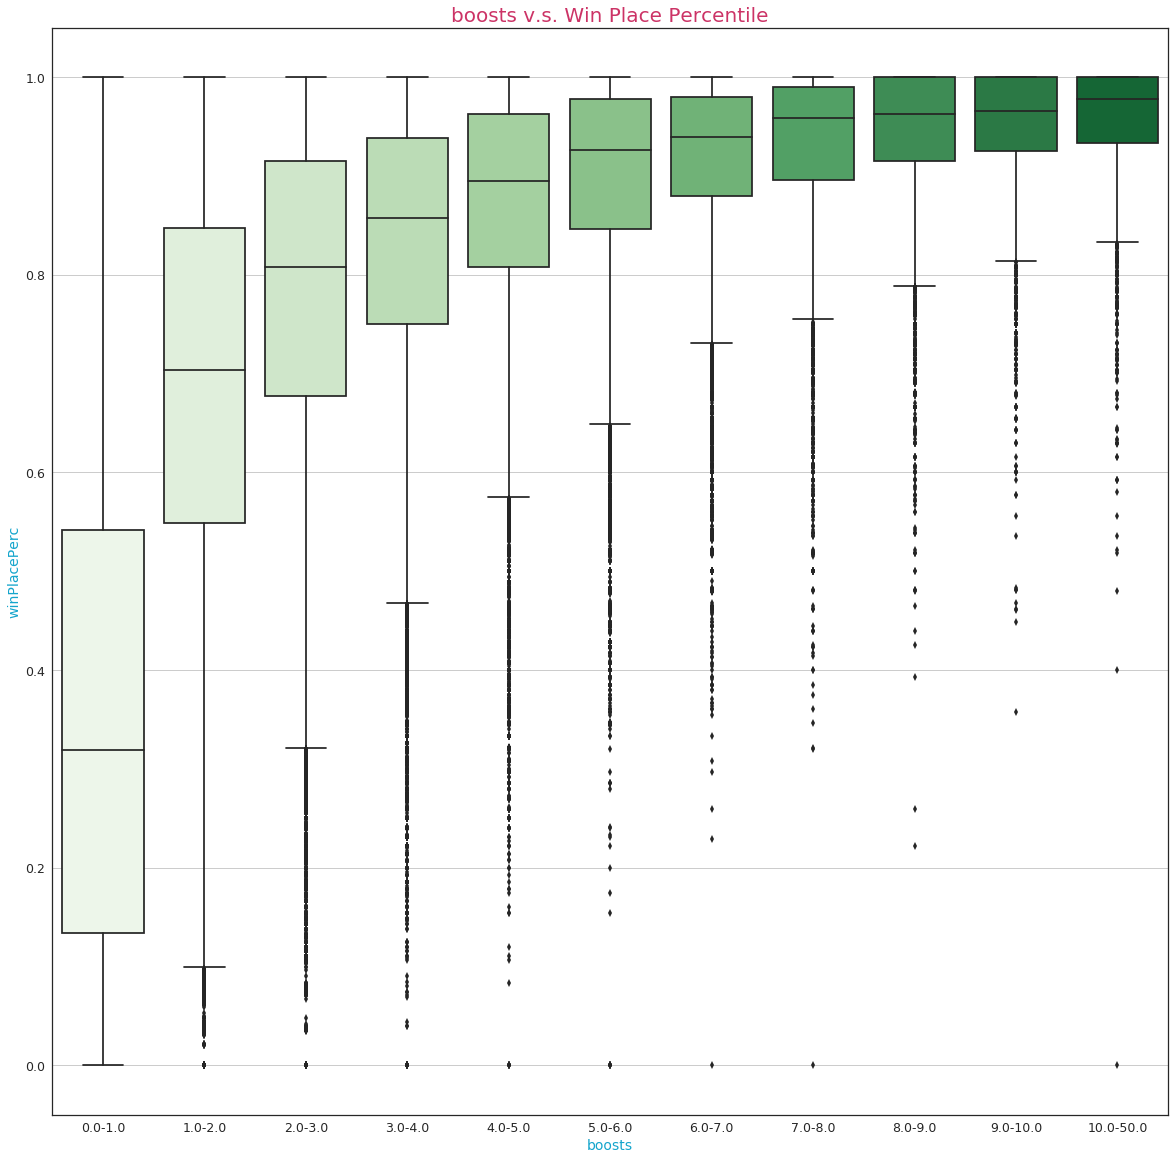

In [82]:
d1 = drop_data['boosts']
d2 = drop_data['winPlacePerc']
data = pd.concat([d1,d2], axis = 1)
kills = data.copy()
print("99% of players' walk distance is lower than {} meters".format(kills['boosts'].quantile(0.99)))

cut_range = np.linspace(0,10,11)
cut_range = np.append(cut_range, 50)
kills['longestKillGrouping'] = pd.cut(kills['boosts'],
                                 cut_range,
                                 labels=["{}-{}".format(a_, b_) for a_, b_ in zip(cut_range[:12], cut_range[1:])],
                                 include_lowest=True
                                )

fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(x="longestKillGrouping", y="winPlacePerc", data=kills, ax=ax, palette=sns.color_palette("Greens", 12))
ax.set_xlabel('boosts', size=14, color="#14A5CC")
ax.set_ylabel('winPlacePerc', size=14, color="#14A5CC")
ax.set_title('boosts v.s. Win Place Percentile', size=20, color="#CC3366")
plt.gca().yaxis.grid(True)
plt.show()

99% of players' walk distance is lower than 7.0 meters


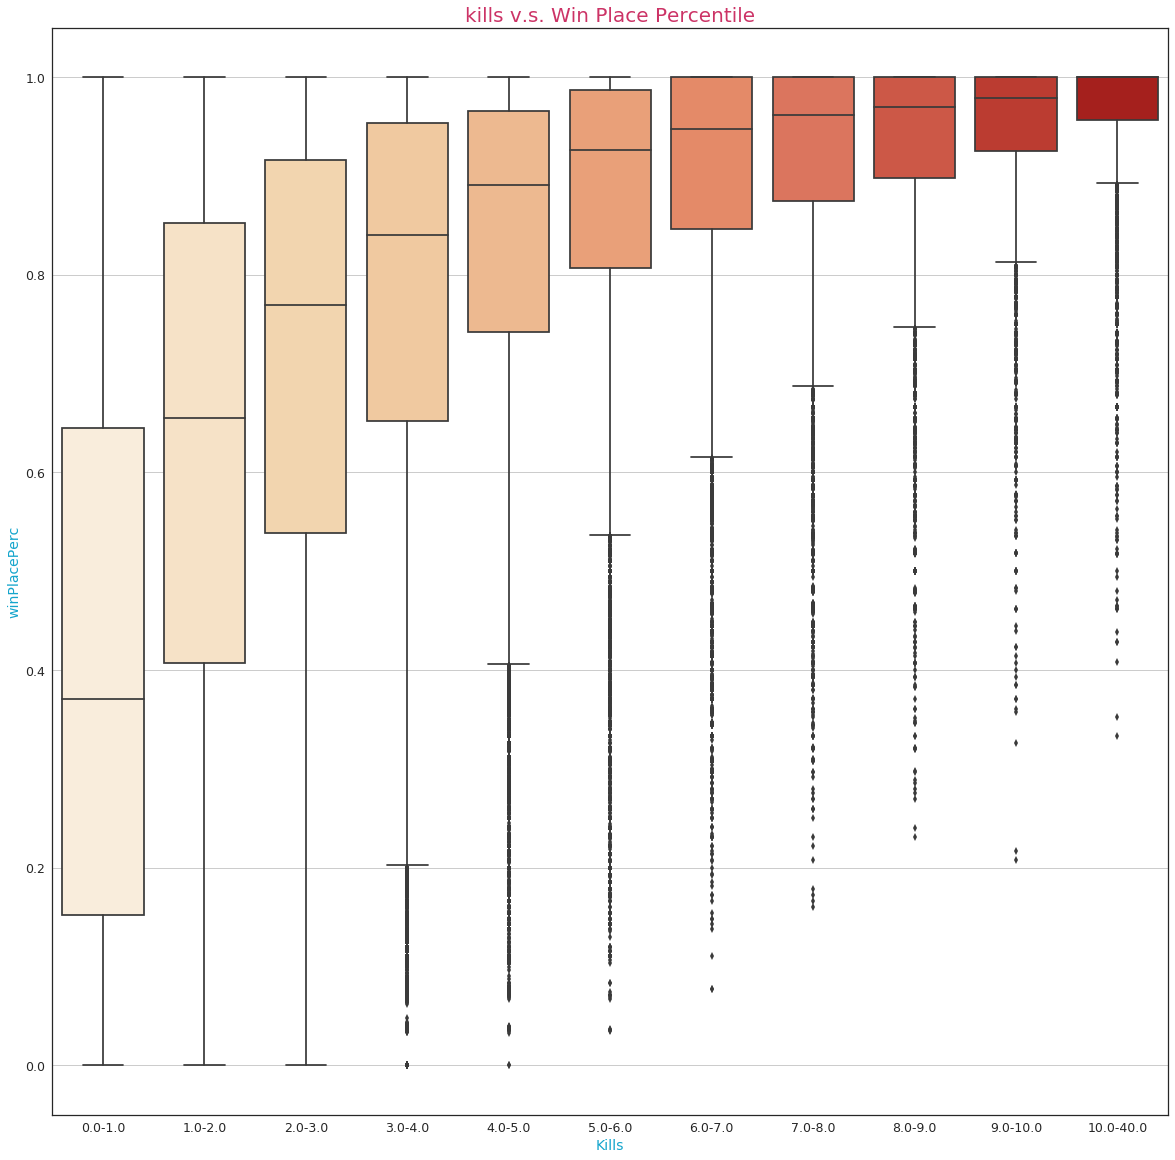

In [79]:
d1 = drop_data['kills']
d2 = drop_data['winPlacePerc']
data = pd.concat([d1,d2], axis = 1)
kills = data.copy()
print("99% of players' walk distance is lower than {} meters".format(kills['kills'].quantile(0.99)))

cut_range = np.linspace(0,10,11)
cut_range = np.append(cut_range, 40)
kills['longestKillGrouping'] = pd.cut(kills['kills'],
                                 cut_range,
                                 labels=["{}-{}".format(a_, b_) for a_, b_ in zip(cut_range[:12], cut_range[1:])],
                                 include_lowest=True
                                )

fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(x="longestKillGrouping", y="winPlacePerc", data=kills, ax=ax, palette=sns.color_palette("OrRd", 12))
ax.set_xlabel('Kills', size=14, color="#14A5CC")
ax.set_ylabel('winPlacePerc', size=14, color="#14A5CC")
ax.set_title('kills v.s. Win Place Percentile', size=20, color="#CC3366")
plt.gca().yaxis.grid(True)
plt.show()

99% of players' walk distance is lower than 10.0 meters


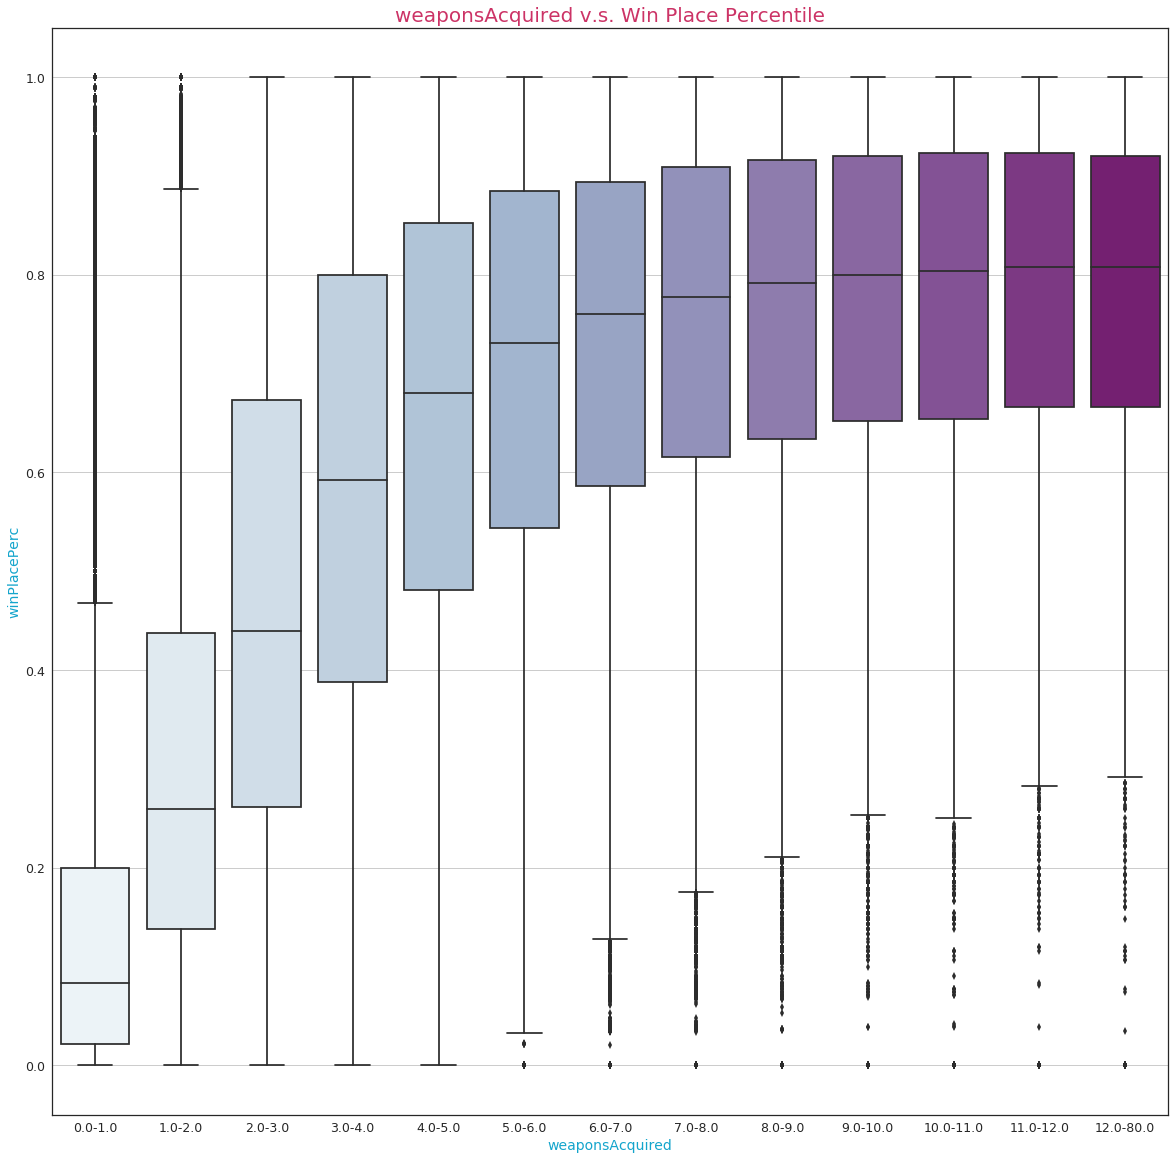

In [76]:
d1 = drop_data['weaponsAcquired']
d2 = drop_data['winPlacePerc']
data = pd.concat([d1,d2], axis = 1)
kills = data.copy()
print("99% of players' walk distance is lower than {} meters".format(kills['weaponsAcquired'].quantile(0.99)))

cut_range = np.linspace(0,12,13)
cut_range = np.append(cut_range, 80)
kills['longestKillGrouping'] = pd.cut(kills['weaponsAcquired'],
                                 cut_range,
                                 labels=["{}-{}".format(a_, b_) for a_, b_ in zip(cut_range[:14], cut_range[1:])],
                                 include_lowest=True
                                )

fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(x="longestKillGrouping", y="winPlacePerc", data=kills, ax=ax, palette=sns.color_palette("BuPu", 14))
ax.set_xlabel('weaponsAcquired', size=14, color="#14A5CC")
ax.set_ylabel('winPlacePerc', size=14, color="#14A5CC")
ax.set_title('weaponsAcquired v.s. Win Place Percentile', size=20, color="#CC3366")
plt.gca().yaxis.grid(True)
plt.show()

99% of players' walk distance is lower than 12.0 meters


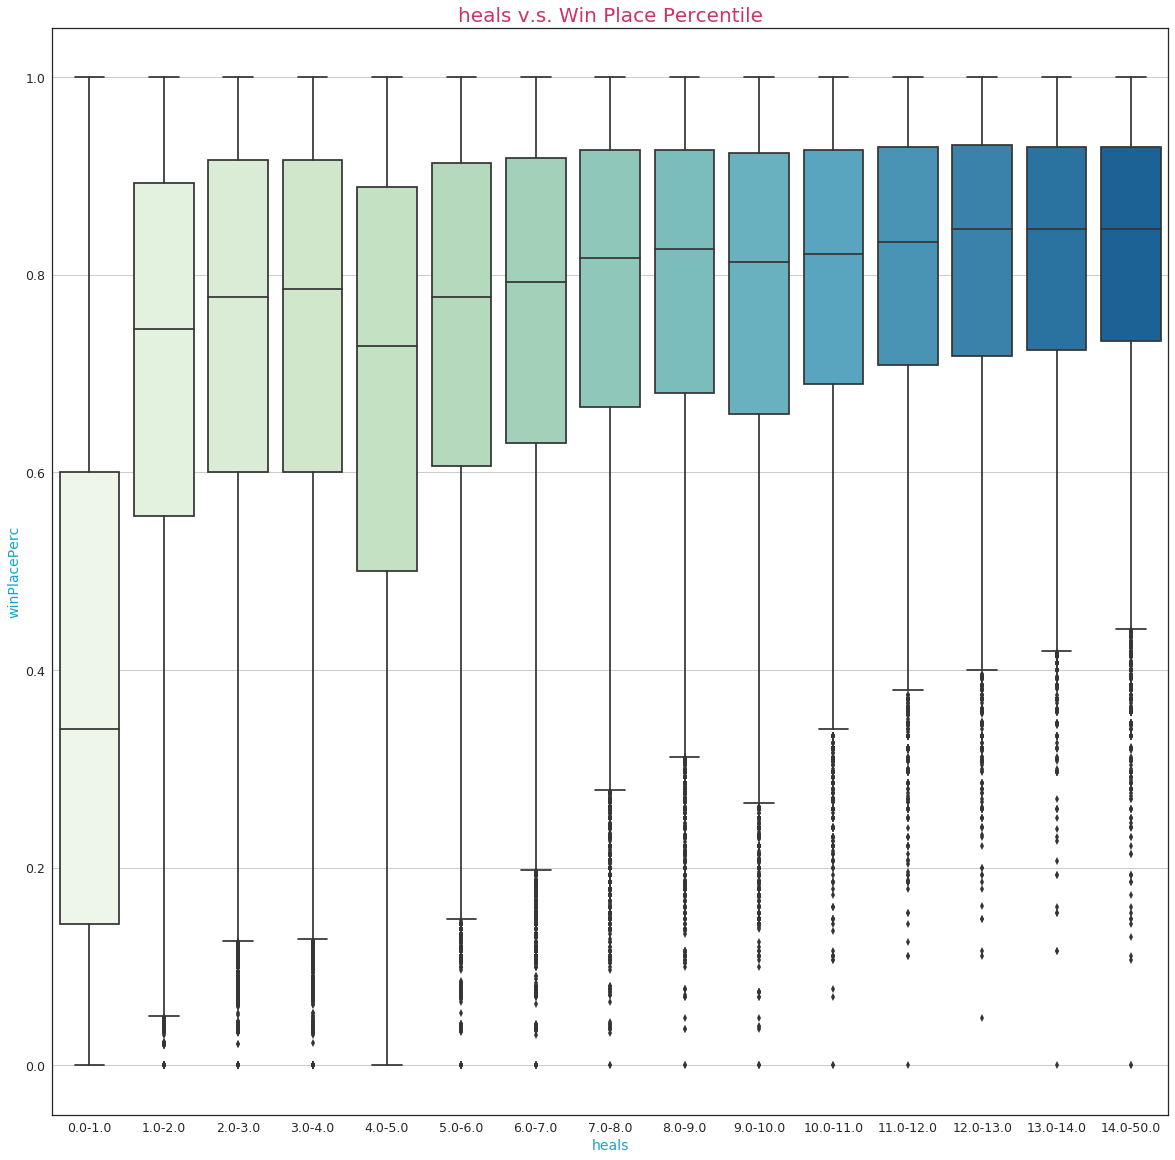

In [81]:
d1 = drop_data['heals']
d2 = drop_data['winPlacePerc']
data = pd.concat([d1,d2], axis = 1)
kills = data.copy()
print("99% of players' walk distance is lower than {} meters".format(kills['heals'].quantile(0.99)))

cut_range = np.linspace(0,14,15)
cut_range = np.append(cut_range, 50)
kills['longestKillGrouping'] = pd.cut(kills['heals'],
                                 cut_range,
                                 labels=["{}-{}".format(a_, b_) for a_, b_ in zip(cut_range[:16], cut_range[1:])],
                                 include_lowest=True
                                )

fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(x="longestKillGrouping", y="winPlacePerc", data=kills, ax=ax, palette=sns.color_palette("GnBu", 16))
ax.set_xlabel('heals', size=14, color="#14A5CC")
ax.set_ylabel('winPlacePerc', size=14, color="#14A5CC")
ax.set_title('heals v.s. Win Place Percentile', size=20, color="#CC3366")
plt.gca().yaxis.grid(True)
plt.show()